<a href="https://colab.research.google.com/github/Mohor35/CSE22005_ml/blob/main/CSE22005_lab2_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question A1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Purchase_data.xlsx to Purchase_data (1).xlsx


In [ ]:
import pandas as pd
import numpy as np

# Load the data into a DataFrame (assuming the file is already uploaded in Colab)
df = pd.read_excel('Purchase_data.xlsx')  # Adjust with the correct file name

# Extract columns for matrix A (inputs) and C (outputs)
a_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
c_column = 'Payment (Rs)'

# Extract matrices A and C
A = df[a_columns].values
C = df[c_column].values

# Convert to numpy arrays
A = np.array(A)
C = np.array(C).reshape(-1, 1)  # Reshape C to be a column vector

# Display the matrices
print("\nMatrix A:")
print(A)

print("\nMatrix C:")
print(C)

# Dimensionality of vector space (number of columns in A)
dimensionality = A.shape[1]

# Number of vectors in the space (number of rows in A)
num_vectors = A.shape[0]

# Rank of matrix A
rank_A = np.linalg.matrix_rank(A)

# Calculate the pseudo-inverse of matrix A
A_pseudo_inv = np.linalg.pinv(A)

# Calculate the cost of each product (X) using AX = C => X = A_pseudo_inv * C
X = np.dot(A_pseudo_inv, C)

# Output results
print(f"\nDimensionality of the vector space: {dimensionality}")
print(f"Number of vectors: {num_vectors}")
print(f"Rank of matrix A: {rank_A}")
print("\nCost of each product (Candies, Mangoes, Milk Packets):")
print(X)



Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]

Matrix C:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]

Dimensionality of the vector space: 3
Number of vectors: 10
Rank of matrix A: 3

Cost of each product (Candies, Mangoes, Milk Packets):
[[ 1.]
 [55.]
 [18.]]


Question A2

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_excel('Purchase_data.xlsx')

# Extract columns for matrix A (inputs) and C (outputs)
a_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
c_column = 'Payment (Rs)'

# Extract matrices A and C
A = df[a_columns].values
C = df[c_column].values

# Convert to numpy arrays
A = np.array(A)
C = np.array(C).reshape(-1, 1)  # Reshape C to be a column vector

# Calculate the pseudo-inverse of matrix A
A_pseudo_inv = np.linalg.pinv(A)

# Calculate the model vector X (Cost of each product)
X = np.dot(A_pseudo_inv, C)

# Output the calculated cost of each product
print("\nModel Vector X (Cost per unit of Candies, Mangoes, and Milk Packets):")
print(X)



Model Vector X (Cost per unit of Candies, Mangoes, and Milk Packets):
[[ 1.]
 [55.]
 [18.]]


Question A3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_excel('Purchase_data.xlsx', sheet_name='Sheet1')

print("Column Names:", df.columns)


payment_column = 'Payment (Rs)'


df['Class'] = df[payment_column].apply(lambda x: 'RICH' if x > 200 else 'POOR')


features = df.drop(columns=['Class', payment_column])
labels = df['Class']


features = pd.get_dummies(features)


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Column Names: Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)'],
      dtype='object')
Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         2
        RICH       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Question A4

In [5]:
from google.colab import files
uploaded = files.upload()

Saving IRCTC stock price.xlsx to IRCTC stock price.xlsx


        Date Month  Day    Price     Open     High      Low   Volume    Chg%
0 2021-06-29   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M  0.0020
1 2021-06-28   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K  0.0043
2 2021-06-25   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K -0.0020
3 2021-06-24   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K -0.0026
4 2021-06-23   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K -0.0023
Index(['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume',
       'Chg%'],
      dtype='object')
Population mean of Price: 1560.66
Population variance of Price: 58732.37

Sample mean of Price for Wednesdays: 1550.71
Difference from population mean: -9.96

Sample mean of Price for April: 1698.95
Difference from population mean: 138.29

Probability of making a loss: 0.50
Probability of making a profit on Wednesday: 0.42
Conditional probability of making profit, given that today is Wednesday: 0.17


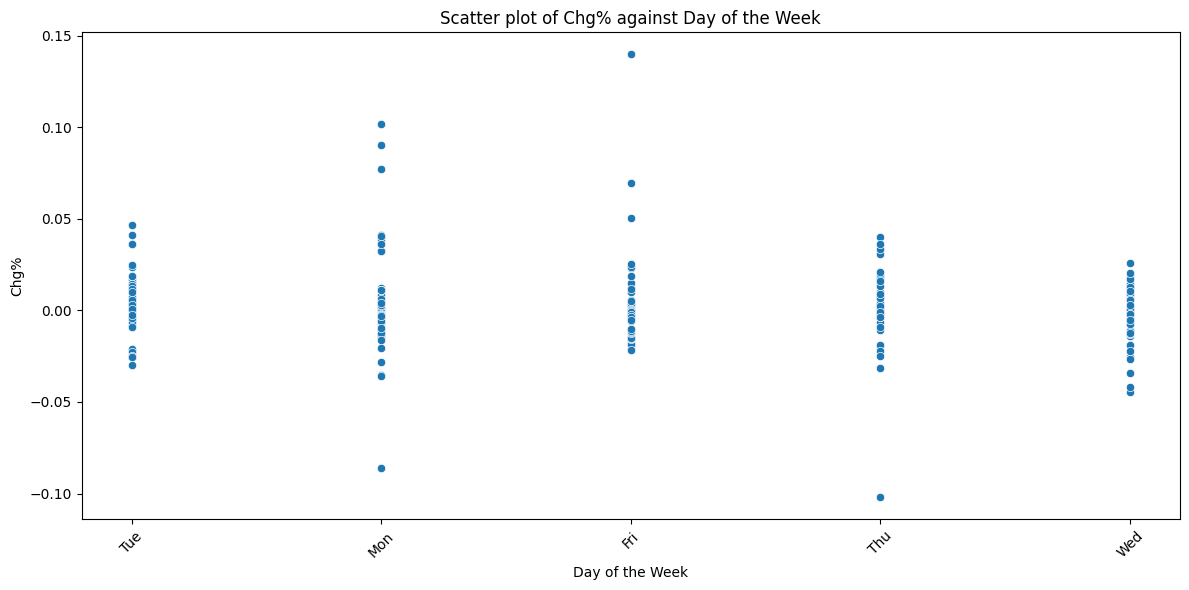

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, variance
import seaborn as sns

# Path to your Excel file
file_path = 'IRCTC stock price.xlsx'

# Load data from the 'Sheet1' sheet of the Excel file
data = pd.read_excel(file_path, sheet_name='Sheet1', parse_dates=['Date'])

# Check the first few rows and columns of the data
print(data.head())
print(data.columns)

# Calculate mean and variance of Price
price_mean = mean(data['Price'])
price_variance = variance(data['Price'])

print(f"Population mean of Price: {price_mean:.2f}")
print(f"Population variance of Price: {price_variance:.2f}")

# Select price data for Wednesdays and calculate sample mean
wednesday_data = data[data['Day'] == 'Wed']
wednesday_mean = mean(wednesday_data['Price'])

print(f"\nSample mean of Price for Wednesdays: {wednesday_mean:.2f}")
print(f"Difference from population mean: {wednesday_mean - price_mean:.2f}")

# Select price data for April and calculate sample mean
april_data = data[data['Date'].dt.month == 4]
april_mean = mean(april_data['Price'])

print(f"\nSample mean of Price for April: {april_mean:.2f}")
print(f"Difference from population mean: {april_mean - price_mean:.2f}")

# Convert Chg% to numeric if it's in string format
if data['Chg%'].dtype == 'object':
    data['Chg%'] = data['Chg%'].str.rstrip('%').astype('float') / 100.0

# Calculate probability of making a loss
loss_prob = len(data[data['Chg%'] < 0]) / len(data)
print(f"\nProbability of making a loss: {loss_prob:.2f}")

# Calculate probability of making a profit on Wednesday
wednesday_profit_prob = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data)
print(f"Probability of making a profit on Wednesday: {wednesday_profit_prob:.2f}")

# Calculate conditional probability of making profit, given that today is Wednesday
total_profit_days = len(data[data['Chg%'] > 0])
wednesday_profit_days = len(wednesday_data[wednesday_data['Chg%'] > 0])
conditional_prob = wednesday_profit_days / total_profit_days
print(f"Conditional probability of making profit, given that today is Wednesday: {conditional_prob:.2f}")

# Create a scatter plot of Chg% against the day of the week
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Day', y='Chg%', data=data)
plt.title('Scatter plot of Chg% against Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question A5

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Thyroid.xlsx to Thyroid (1).xlsx


First few rows of the dataset:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            

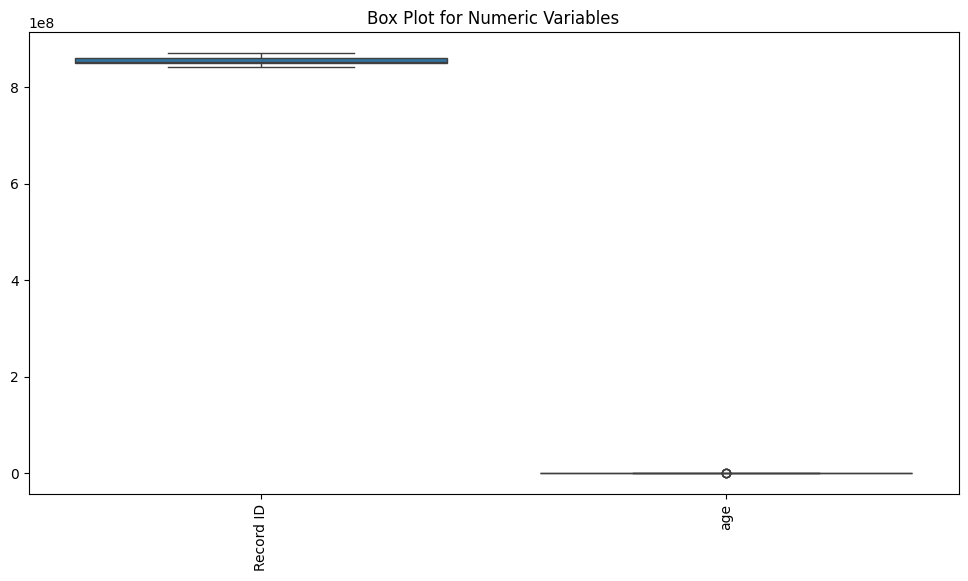


Outliers detection using Z-score:
Outliers in column Record ID: 0
Outliers in column age: 3

Mean and Variance for Numeric Variables:
Column: Record ID
Mean: 852947346.6122983
Variance: 57486250586150.28
Standard Deviation: 7581968.7803465845

Column: age
Mean: 73.55582206716092
Variance: 1401800.868871345
Standard Deviation: 1183.976718044466



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Load the dataset from the Excel file
df = pd.read_excel('Thyroid.xlsx', sheet_name='Sheet1')  # Adjust 'Sheet1' if needed

# Display the first few rows of the dataset and data types
print("First few rows of the dataset:")
print(df.head())
print("\nData types of each attribute:")
print(df.dtypes)

# Identify the attribute types
print("\nAttribute types:")
print(df.info())


ordinal_columns = []
nominal_columns = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick',
                    'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
                    'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured',
                    'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source', 'Condition']


le = LabelEncoder()
for col in ordinal_columns:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])


df = pd.get_dummies(df, columns=nominal_columns)


print("\nData range for numeric variables:")
print(df.describe())


print("\nMissing values in each attribute:")
print(df.isnull().sum())


plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title('Box Plot for Numeric Variables')
plt.show()

# Outliers detection using Z-score
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nOutliers detection using Z-score:")
for col in numeric_columns:
    z_scores = stats.zscore(df[col].dropna())
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > 3)
    print(f"Outliers in column {col}: {df[col][outliers].count()}")

# Calculate mean and variance for numeric variables
print("\nMean and Variance for Numeric Variables:")
for col in numeric_columns:
    mean = df[col].mean()
    variance = df[col].var()
    std_dev = df[col].std()
    print(f"Column: {col}")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}")
    print()


Question A6

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_excel('Thyroid.xlsx', sheet_name='Sheet1')


print("Missing values before imputation:")
print(df.isnull().sum())




def impute_missing_values(df):

    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_columns:

        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()


        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        if outliers.any():

            df[col].fillna(median, inplace=True)
        else:

            df[col].fillna(mean, inplace=True)


    categorical_columns = df.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)

    return df


df = impute_missing_values(df)


print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values before imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

Question A7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df = pd.read_excel('Thyroid.xlsx', sheet_name='Sheet1')


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


print("\nRange of numeric attributes before normalization:")
print(df[numeric_columns].describe())


def normalize_data(df):

    min_max_scaler = MinMaxScaler()
    standard_scaler = StandardScaler()


    for col in numeric_columns:

        mean = df[col].mean()
        std_dev = df[col].std()


        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        if outliers.any():

            df[col] = standard_scaler.fit_transform(df[[col]])
        else:

            df[col] = min_max_scaler.fit_transform(df[[col]])

    return df

df = normalize_data(df)


print("\nRange of numeric attributes after normalization:")
print(df[numeric_columns].describe())



Range of numeric attributes before normalization:
          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000

Range of numeric attributes after normalization:
         Record ID           age
count  9172.000000  9.172000e+03
mean      0.414296  7.746868e-18
std       0.258611  1.000055e+00
min       0.000000 -6.128480e-02
25%       0.327716 -3.087714e-02
50%       0.348012 -1.567331e-02
75%       0.679105 -4.692765e-03
max       1.000000  5.528488e+01


Question A8

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Thyroid.xlsx', sheet_name='Sheet1')


binary_columns = df.select_dtypes(include=['object']).columns
binary_df = df[binary_columns].apply(lambda x: x.map(lambda val: 1 if val == 't' else (0 if val == 'f' else np.nan)))


vector1 = binary_df.iloc[0]
vector2 = binary_df.iloc[1]


f11 = ((vector1 == 1) & (vector2 == 1)).sum()
f10 = ((vector1 == 1) & (vector2 == 0)).sum()
f01 = ((vector1 == 0) & (vector2 == 1)).sum()
f00 = ((vector1 == 0) & (vector2 == 0)).sum()

# Calculate Jaccard Coefficient (JC)
jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0

# Calculate Simple Matching Coefficient (SMC)
smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0

# Display results
print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)


Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85


Question A9

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


df = pd.read_excel('Thyroid.xlsx', sheet_name='Sheet1')


vector1 = df.iloc[0]
vector2 = df.iloc[1]


categorical_columns = df.select_dtypes(include=['object']).columns


for col in categorical_columns:
    df[col] = df[col].astype(str)


df[categorical_columns] = df[categorical_columns].fillna('missing')


one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = one_hot_encoder.fit_transform(df[categorical_columns])


encoded_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
df_numeric = df.drop(columns=categorical_columns).join(encoded_df)

vector1_numeric = df_numeric.iloc[0].values.reshape(1, -1)
vector2_numeric = df_numeric.iloc[1].values.reshape(1, -1)


cosine_sim = cosine_similarity(vector1_numeric, vector2_numeric)


print("Cosine Similarity:", cosine_sim[0][0])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cosine Similarity: 0.9999999999999999


Question A10

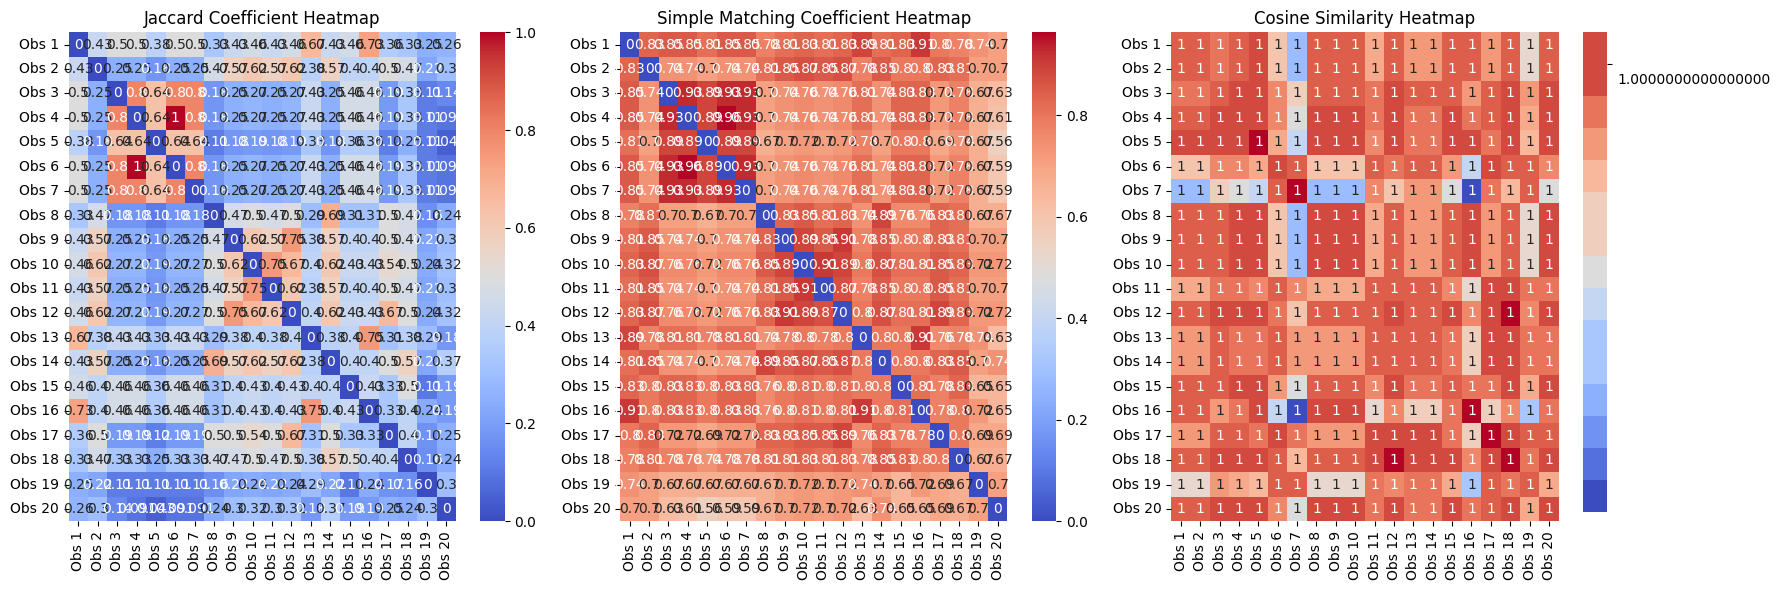

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Thyroid.xlsx', sheet_name='Sheet1')


df_subset = df.head(20).copy()

# Identify categorical columns
categorical_columns = df_subset.select_dtypes(include=['object']).columns

# Ensure all categorical columns are of type string
df_subset.loc[:, categorical_columns] = df_subset[categorical_columns].astype(str)

# Handle missing values by filling with a placeholder or strategy (e.g., 'missing')
df_subset.loc[:, categorical_columns] = df_subset[categorical_columns].fillna('missing')

# Convert categorical attributes to numeric using One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = one_hot_encoder.fit_transform(df_subset[categorical_columns])

# Replace original categorical columns with encoded columns
encoded_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
df_numeric = df_subset.drop(columns=categorical_columns).join(encoded_df)

# Extract numeric vectors
numeric_vectors = df_numeric.values

# Calculate Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC)
def calculate_jaccard_similarity(vec1, vec2):
    intersection = np.sum((vec1 == 1) & (vec2 == 1))
    union = np.sum((vec1 == 1) | (vec2 == 1))
    return intersection / union if union != 0 else 0

def calculate_simple_matching_similarity(vec1, vec2):
    match = np.sum(vec1 == vec2)
    total = len(vec1)
    return match / total

num_observations = numeric_vectors.shape[0]
jc_matrix = np.zeros((num_observations, num_observations))
smc_matrix = np.zeros((num_observations, num_observations))
cosine_matrix = np.zeros((num_observations, num_observations))

for i in range(num_observations):
    for j in range(i + 1, num_observations):
        jc = calculate_jaccard_similarity(numeric_vectors[i], numeric_vectors[j])
        smc = calculate_simple_matching_similarity(numeric_vectors[i], numeric_vectors[j])
        jc_matrix[i, j] = jc_matrix[j, i] = jc
        smc_matrix[i, j] = smc_matrix[j, i] = smc

# Calculate Cosine Similarity
cosine_matrix = cosine_similarity(numeric_vectors)


jc_df = pd.DataFrame(jc_matrix, columns=[f'Obs {i+1}' for i in range(num_observations)], index=[f'Obs {i+1}' for i in range(num_observations)])
smc_df = pd.DataFrame(smc_matrix, columns=[f'Obs {i+1}' for i in range(num_observations)], index=[f'Obs {i+1}' for i in range(num_observations)])
cosine_df = pd.DataFrame(cosine_matrix, columns=[f'Obs {i+1}' for i in range(num_observations)], index=[f'Obs {i+1}' for i in range(num_observations)])


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(jc_df, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Jaccard Coefficient Heatmap')

sns.heatmap(smc_df, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Simple Matching Coefficient Heatmap')

sns.heatmap(cosine_df, annot=True, cmap='coolwarm', ax=axs[2])
axs[2].set_title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()
